# Setting up

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk

from tqdm import trange
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
# load data
data = pd.read_csv('fake_job_postings.csv')

In [3]:
# drop job id column
data.drop('job_id', axis=1, inplace=True)

In [4]:
# view data
data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


# EDA
### Exploratory data analysis 
https://www.kaggle.com/code/harshsingh2209/complete-guide-to-eda-on-text-data \
The link above is for exploring textual data, so please use these methods on the company_profile, description, requirements, and benefits columns
https://www.geeksforgeeks.org/exploratory-data-analysis-in-python/ \
Can use this link for eda on other columns, but feel free to use other websites or perform eda how you would like 

In [5]:
import warnings
warnings.filterwarnings('ignore')
nltk.download('omw-1.4', quiet=True)
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (17,7)
plt.rcParams['font.size'] = 18

# taking a look at labels
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

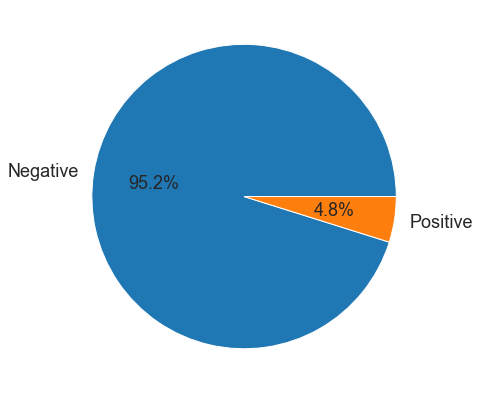

In [6]:
def fraudulents(fraudulent):
    if fraudulent==1:
        return "Positive"
    if fraudulent==0:
        return "Negative"
data['fraudulent'] = data['fraudulent'].apply(fraudulents)
plt.pie(data['fraudulent'].value_counts(), labels=data['fraudulent'].unique().tolist(), autopct='%1.1f%%')
plt.show()

In [7]:
length = len(data['company_profile'][0])
print(f'Length of a sample review: {length}')

Length of a sample review: 885


In [8]:
data['Length'] = data['company_profile'].str.len()

word_count = data['company_profile'][0].split()
print(f'Word count in a sample review: {len(word_count)}')

Word count in a sample review: 141


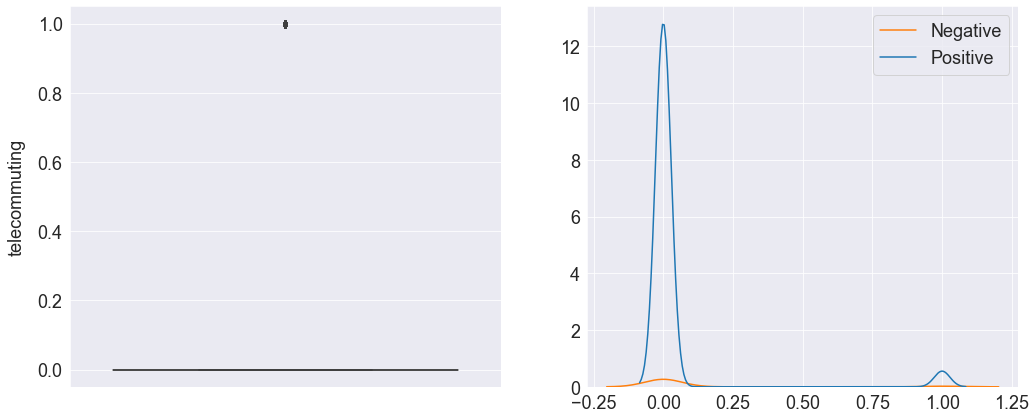

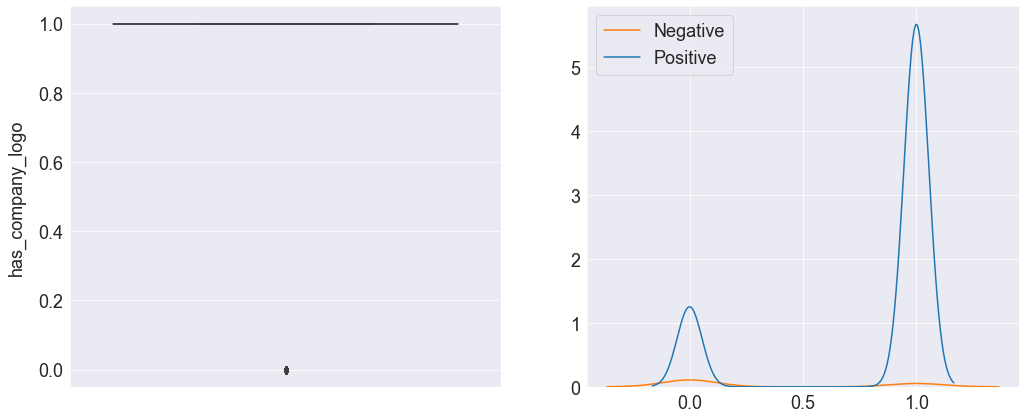

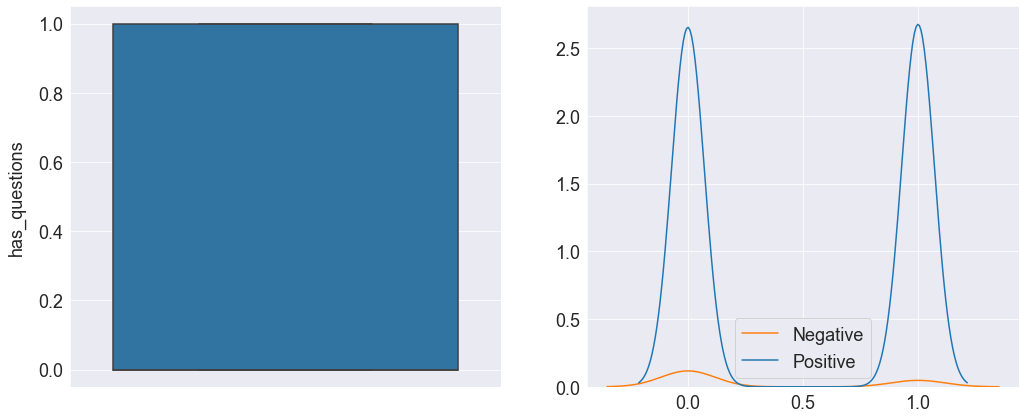

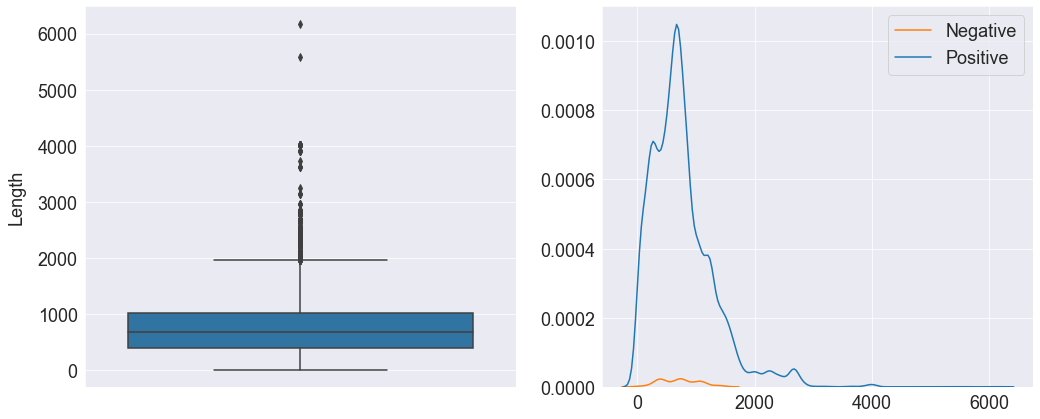

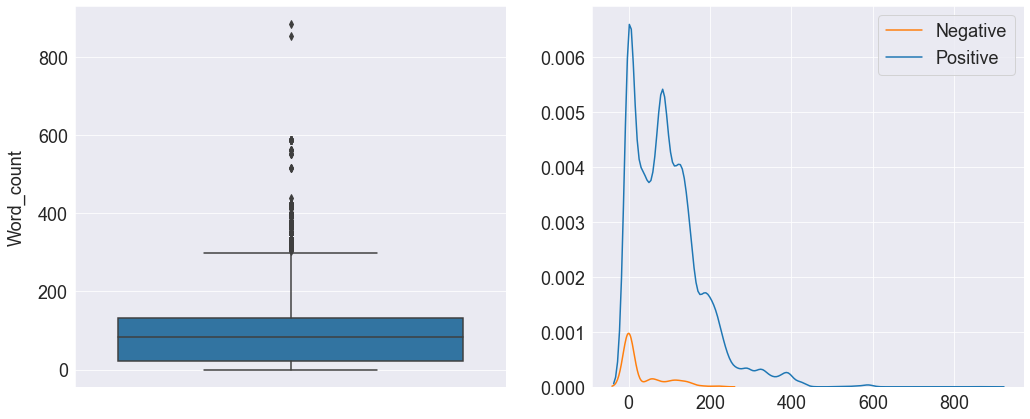

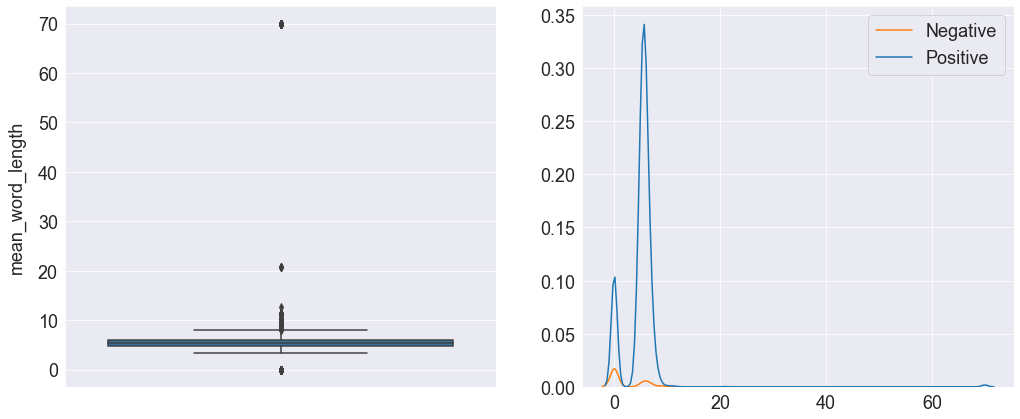

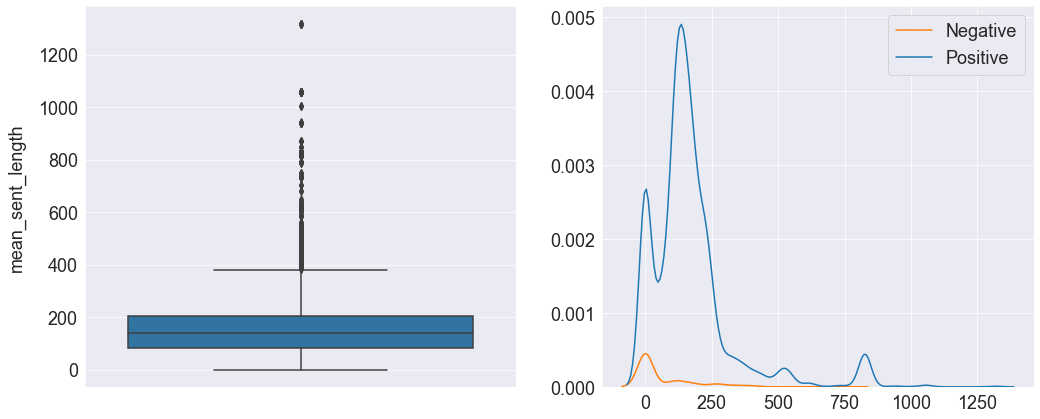

In [9]:
def word_count(review):
    if isinstance(review, str):
        company_profile_list = review.split()
        return len(company_profile_list)
    else:
        return 0

data['Word_count'] = data['company_profile'].apply(word_count)
data['mean_word_length'] = data['company_profile'].map(
    lambda rev: np.mean([len(word) for word in rev.split()]) if isinstance(rev, str) else 0
)
np.mean([len(sent) for sent in tokenize.sent_tokenize(data['company_profile'][0])])
data['mean_sent_length'] = data['company_profile'].map(
    lambda rev: np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]) if isinstance(rev, str) else 0
)
data.head(10)

def visualize(col):
    print()
    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[col], hue=data['fraudulent'])
    plt.ylabel(col, labelpad=12.5)

    plt.subplot(1, 2, 2)
    
    # Melt data to long format for kdeplot
    melted_data = data.melt(id_vars='fraudulent', value_vars=[col], var_name='feature', value_name='value')
    sns.kdeplot(data=melted_data, x='value', hue='fraudulent')
    
    plt.legend(data['fraudulent'].unique())
    plt.xlabel('')
    plt.ylabel('')

    plt.show()

numeric_features = [col for col in data.columns.tolist()[2:] if data[col].dtype.kind in ('i', 'f')]
for feature in numeric_features:
    visualize(feature)
    

In [ ]:
df = data.drop(numeric_features, axis=1)
def clean(review):
    if not isinstance(review, str):
        return ""

    review = review.lower()
    review = re.sub('[^a-z A-Z 0-9-]+', '', review)
    review = " ".join([word for word in review.split() if word not in stopwords.words('english')])
    
    return review
df['company_profile'] = df['company_profile'].apply(clean)
df.head(10)
df['company_profile'][0]
def corpus(text):
    text_list = text.split()
    return text_list
df['company_profile'] = df['company_profile'].apply(corpus)
df.head(10)

# Feature Extraction
Air is working on this, no need to worry about this section currently

In [5]:
# extract location
location = data[['location']]

In [6]:
# create column for country
country = []
for i in range(len(location)):
    if type(location.iloc[i].values[0]) == str:
        country.append(location.iloc[i].values[0].split(', ')[0].strip())
    else:
        country.append('not provided')

In [7]:
# append column to dataframe
data['country'] = country

In [8]:
# create column for city
city = []
for i in range(len(location)):
    if type(location.iloc[i].values[0]) == str:
        if len(location.iloc[i].values[0].split(',')) == 3:
            if len(location.iloc[i].values[0].split(',')[-1].strip()) > 2:
                if location.iloc[i].values[0].split(',')[-1] != ' ':
                    city.append(location.iloc[i].values[0].split(',')[-1].strip())
                elif location.iloc[i].values[0].split(',')[-1] == ' ':
                    city.append('not provided')
                elif location.iloc[i].values[0].split(',')[-1] == '  ':
                    city.append('not provided')
            elif len(location.iloc[i].values[0].split(',')[-1].strip()) == 2:
                city.append('not provided')
            elif len(location.iloc[i].values[0].split(',')[-1].strip()) < 2:
                city.append('not provided')
        elif len(location.iloc[i].values[0].split(',')) != 3:
            city.append('not provided')
    else:
        city.append('not provided')

In [9]:
# append column to dataframe
data['city'] = city

In [10]:
# drop location
data.drop(columns=['location'], inplace = True)

In [11]:
# create new variables for salary lower range and salary upper range
salary_range_lower = []
salary_range_upper = []
for i in range(len(data)):
    if type(data['salary_range'].iloc[i]) == str:
        sal = data['salary_range'].iloc[i]
        sal_list = sal.split('-')
        if sal_list[0].isdigit() == True and sal_list[-1].isdigit() == True:
            salary_range_lower.append(int(sal_list[0]))
            salary_range_upper.append(int(sal_list[-1]))
        else:
            salary_range_lower.append(0)
            salary_range_upper.append(0)
    else:
        salary_range_lower.append(0)
        salary_range_upper.append(0)

In [12]:
# add columns to dataframe
data['salary_range_lower'] = salary_range_lower
data['salary_range_upper'] = salary_range_upper

In [13]:
# drop column
data.drop(columns=['salary_range'], inplace = True)

In [18]:
# fill in nans with 'not provided'
data['benefits'] = data['benefits'].fillna('not provided')
data['employment_type'] = data['employment_type'].fillna('not provided')
data['required_experience'] = data['required_experience'].fillna('not provided')
data['required_education'] = data['required_education'].fillna('not provided')
data['industry'] = data['industry'].fillna('not provided')
data['function'] = data['function'].fillna('not provided')

In [65]:
data

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,city,salary_range_lower,salary_range_upper
0,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,not provided,0,1,0,Other,Internship,not provided,not provided,Marketing,0,US,New York,0,0
1,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,not provided,Marketing and Advertising,Customer Service,0,NZ,Auckland,0,0
2,Commissioning Machinery Assistant (CMA),NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,not provided,0,1,0,not provided,not provided,not provided,not provided,not provided,0,US,Wever,0,0
3,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,Washington,0,0
4,Bill Review Manager,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,Fort Worth,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,not provided,Computer Software,Sales,0,CA,Toronto,0,0
17876,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US,Philadelphia,0,0
17877,Project Cost Control Staff Engineer - Cost Con...,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,not provided,0,0,0,Full-time,not provided,not provided,not provided,not provided,0,US,Houston,0,0
17878,Graphic Designer,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG,Lagos,0,0


# Modeling

I am struggling haha

https://www.tensorflow.org/text/tutorials/classify_text_with_bert 